In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ItVedantPythonAWPClasswork/csv datasets/Wine.csv')

In [ ]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
df.shape

(178, 14)

In [ ]:
#to check null values 
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [ ]:
#checking type to confirm null values
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
Customer_Segment          int64
dtype: object

In [ ]:
#checking duplicate values
df.duplicated().sum()

0

In [ ]:
# Now Select input and output
X=df.drop('Customer_Segment',axis=1)   # input 
Y=df['Customer_Segment']               # output

In [ ]:
X.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Customer_Segment, dtype: int64

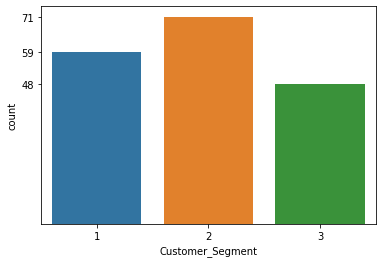

In [ ]:
sns.countplot(data=df,x='Customer_Segment')
f=df['Customer_Segment'].value_counts()
plt.yticks(f)
plt.show()

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,
                                    random_state=1,stratify=Y)
#stratify=output variablename

In [ ]:
Y_train.value_counts()

2    50
1    41
3    33
Name: Customer_Segment, dtype: int64

In [ ]:
Y_test.value_counts()

2    21
1    18
3    15
Name: Customer_Segment, dtype: int64

In [ ]:
# Now applying Scaling on input data X_train and X_test before we train the model
# Apply StandardScaler on input data training and testing
from sklearn.preprocessing import StandardScaler
# Create an object of StandardScaler class
ss=StandardScaler()
#means apply standard scaler for X_train and X_test data
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [ ]:
X.shape

(178, 13)

In [ ]:
# creating Architecture for Neural networl
import tensorflow as tf
#create a object of sequential class
model=tf.keras.Sequential([
  tf.keras.layers.Dense(units=13,activation='relu',input_dim=13),
  #first hidden layer #input_shape(X.shape[1],) or input_dim=no. of input
  tf.keras.layers.Dense(units=13,activation='relu'),#second hidden layer  
  tf.keras.layers.Dense(units=13,activation='softmax') #classification = softmax
  #here unit 3 as multiclassClassifier 
  #last is output layer 3rd layer                  
])

In [ ]:
#to show model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                182       
                                                                 
 dense_1 (Dense)             (None, 13)                182       
                                                                 
 dense_2 (Dense)             (None, 12)                168       
                                                                 
Total params: 532
Trainable params: 532
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#adam means adagrad+RMS propotional
#adagrad means momentum 
#and rms propotional means direction

In [ ]:
#create a procedure for callback(Earlystopping)
#Early Stopping : 
#EarlyStopping : for decide epoch
#create a procedure for callback 
from tensorflow.keras.callbacks import EarlyStopping             
#create callback : -
#EarlyStopping() inbuilt function
cb=EarlyStopping(
    monitor="val_loss",  #val_loss means testing error
    min_delta=0.00001, #value of lambda 
    patience=20,
    verbose=1,
    mode="auto", #min loss 
    baseline=None,
    restore_best_weights=False
)

In [ ]:
#train the model
trained_model=model.fit(X_train,Y_train,epochs=4000,batch_size=5,validation_data=(X_test,Y_test),callbacks=cb)

Epoch 1/4000
25/25 [==============================] - 2s 20ms/step - loss: 2.4493 - accuracy: 0.0161 - val_loss: 2.3368 - val_accuracy: 0.0926
Epoch 2/4000
25/25 [==============================] - 0s 6ms/step - loss: 2.1125 - accuracy: 0.3468 - val_loss: 2.0244 - val_accuracy: 0.4259
Epoch 3/4000
25/25 [==============================] - 0s 4ms/step - loss: 1.7970 - accuracy: 0.7823 - val_loss: 1.6951 - val_accuracy: 0.7593
Epoch 4/4000
25/25 [==============================] - 0s 7ms/step - loss: 1.4607 - accuracy: 0.9355 - val_loss: 1.3585 - val_accuracy: 0.8889
Epoch 5/4000
25/25 [==============================] - 0s 9ms/step - loss: 1.1294 - accuracy: 0.9516 - val_loss: 1.0326 - val_accuracy: 0.9074
Epoch 6/4000
25/25 [==============================] - 0s 7ms/step - loss: 0.8320 - accuracy: 0.9677 - val_loss: 0.7644 - val_accuracy: 0.9444
Epoch 7/4000
25/25 [==============================] - 0s 7ms/step - loss: 0.6020 - accuracy: 0.9677 - val_loss: 0.5657 - val_accuracy: 0.9444
Epoch

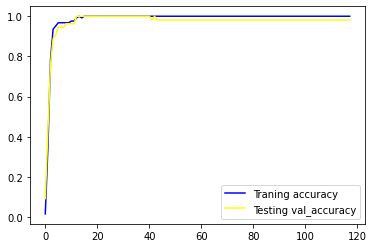

In [ ]:
#visualise the loss(training loss) and val_loss(testing loss)
plt.plot(trained_model.history['accuracy'],color='blue',label='Traning accuracy')
plt.plot(trained_model.history['val_accuracy'],color='yellow',label='Testing val_accuracy')
plt.legend()
plt.show()

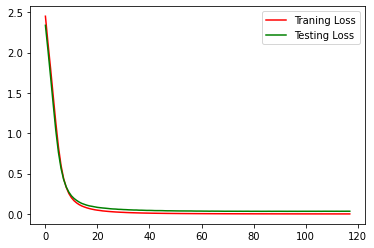

In [ ]:
#visualise the loss(training loss) and val_loss(testing loss)
plt.plot(trained_model.history['loss'],color='red',label='Traning Loss')
plt.plot(trained_model.history['val_loss'],color='green',label='Testing Loss')
plt.legend()
plt.show()